<a href="https://colab.research.google.com/github/ahmedmagdy512/BreastCancerClassifier/blob/master/Breast_Cancer_with_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
dat = load_breast_cancer()
X = dat.data
Y = dat.target
print("Examples = ",X.shape ," Labels = ", Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 
                                                    0.3, random_state=100)
model_pipeline = Pipeline(steps=[
  ("feature_union", FeatureUnion([
    ('missing_values',SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scale', StandardScaler()),
    ("reduce_dim", PCA(n_components=10)),
  ])),
  ('clf', GaussianNB()) ])
model_pipeline.fit(X_train, y_train)
predictions = model_pipeline.predict(X_test)
print(" Accuracy :",metrics.accuracy_score(y_test, predictions))

Examples =  (569, 30)  Labels =  (569,)
 Accuracy : 0.9298245614035088


In [ ]:
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
import tensorflow as tf
from keras.callbacks import ModelCheckpoint

In [ ]:
print(X_train.shape)
print(X_train[0])

(398, 30)
[1.981e+01 2.215e+01 1.300e+02 1.260e+03 9.831e-02 1.027e-01 1.479e-01
 9.498e-02 1.582e-01 5.395e-02 7.582e-01 1.017e+00 5.865e+00 1.124e+02
 6.494e-03 1.893e-02 3.391e-02 1.521e-02 1.356e-02 1.997e-03 2.732e+01
 3.088e+01 1.868e+02 2.398e+03 1.512e-01 3.150e-01 5.372e-01 2.388e-01
 2.768e-01 7.615e-02]


In [ ]:
model = Sequential()
model.add(Dense(1024,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(metrics=['accuracy'],optimizer='adam',loss='binary_crossentropy')
checkPoint=ModelCheckpoint('bestweights.h5',monitor='val_accuracy',save_best_only=True,save_weights_only=True)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,callbacks=[checkPoint])


Train on 398 samples, validate on 171 samples
Epoch 1/20
398/398 [==============================] - 0s 330us/step - loss: 7.3569 - accuracy: 0.5879 - val_loss: 1.4374 - val_accuracy: 0.6199
Epoch 2/20
398/398 [==============================] - 0s 77us/step - loss: 1.5620 - accuracy: 0.7839 - val_loss: 1.9125 - val_accuracy: 0.8129
Epoch 3/20
398/398 [==============================] - 0s 79us/step - loss: 1.1942 - accuracy: 0.8216 - val_loss: 0.5648 - val_accuracy: 0.8246
Epoch 4/20
398/398 [==============================] - 0s 73us/step - loss: 0.3678 - accuracy: 0.9045 - val_loss: 0.6042 - val_accuracy: 0.9064
Epoch 5/20
398/398 [==============================] - 0s 89us/step - loss: 0.6902 - accuracy: 0.8744 - val_loss: 0.6196 - val_accuracy: 0.8187
Epoch 6/20
398/398 [==============================] - 0s 83us/step - loss: 0.4106 - accuracy: 0.9020 - val_loss: 0.2909 - val_accuracy: 0.9298
Epoch 7/20
398/398 [==============================] - 0s 76us/step - loss: 0.3328 - accuracy: 0

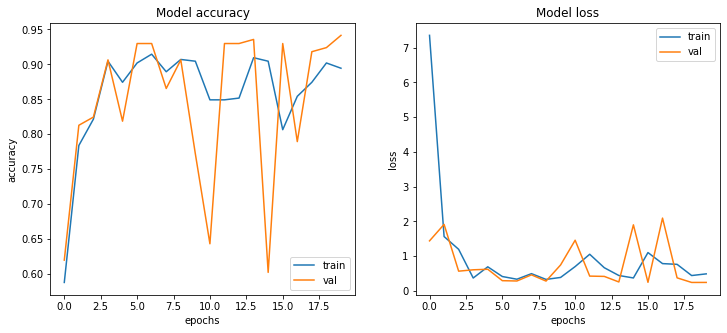

In [ ]:
import matplotlib.pyplot as plt
fig ,ax=plt.subplots(1,2,figsize=(12,5))
ax.ravel()
for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
preds=model.predict(X_test)
accuracy=accuracy_score(y_test,np.round(preds))
print(round(accuracy*100,4),'%')

94.152 %


In [ ]:
"""
@author: hichem felouat
"""
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.decomposition import PCA

dat = datasets.load_breast_cancer()
X = dat.data
Y = dat.target
print("Examples = ",X.shape ," Labels = ", Y.shape)

pca = PCA(n_components = 5)
X_pca = pca.fit_transform(X)
print("Examples = ",X_pca.shape ," Labels = ", Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, 
              Y, test_size= 0.20, random_state=100)

X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_pca, 
              Y, test_size= 0.20, random_state=100)

clf = svm.SVC(kernel='rbf', gamma= 0.001, C=5)
clf.fit(X_train, Y_train)
y_pred1 = clf.predict(X_test)
print(" Accuracy     :",metrics.accuracy_score(Y_test, y_pred1))

clf_pca = svm.SVC(kernel='rbf', gamma= 0.001, C=5)
clf_pca.fit(X_train_pca, Y_train_pca)
y_pred_pca = clf_pca.predict(X_test_pca)
print(" Accuracy pca :",metrics.accuracy_score(Y_test_pca, y_pred_pca))










Examples =  (569, 30)  Labels =  (569,)
Examples =  (569, 5)  Labels =  (569,)
 Accuracy     : 0.9210526315789473
 Accuracy pca : 0.9210526315789473
